# Basic Python for Data Science

A quickstart Python workshop...

## 0. What you will learn

Our aim in this workshop is to make you familiar with the basics of Python, focusing on those aspects that will jump-start your ability to write data-science programs. 

In other words, we want to make you **dangerous enough** soon :-).

Accordingly, we will cover fundamental python concepts including variables, lists, dictionaries, iteration, and functions; moving on to useful list like objects such as Pandas Series and numpy `ndarray`s, and their use in analyzing and making plots of data.

We will end up with the code shown below, which leads to a plot of unemployment rates in multiple American states. This example exercises all basic python concepts for data science..if you understand it you are golden! 

Finally, a homework problem will help cement your understanding, and make you even more dangerous.

Here is what the unemployment data looks like:


```
DATE,FLUR
1976-01-01,9.7
1976-02-01,9.7
1976-03-01,9.6
1976-04-01,9.5
1976-05-01,9.3
1976-06-01,9.2
1976-07-01,9.1
1976-08-01,9.1
1976-09-01,9.1
1976-10-01,9.1
1976-11-01,9.1
1976-12-01,9.1
1977-01-01,9.0
```

...And here is the code...

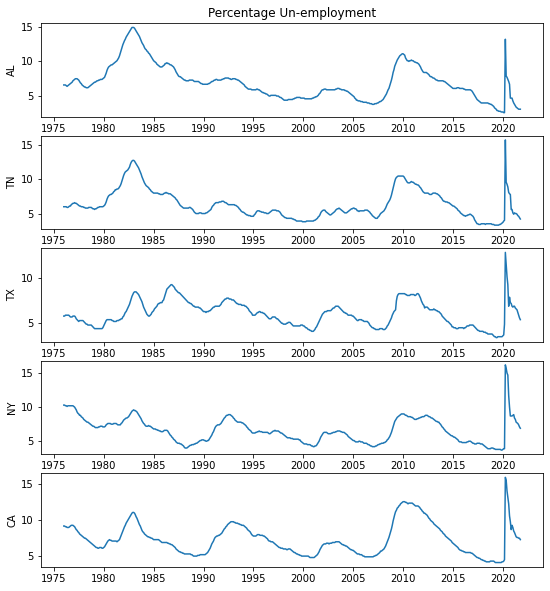

In [2]:
# various imports of libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# setting up plot sizes
width_inches = 9
subplot_height_inches = 2

# defining a function to load and clean unemployment data
def get_unemployment_data(state_abbrev):
    data = pd.read_csv("data/"+state_abbrev+"UR.csv")
    data['DATE'] = pd.to_datetime(data['DATE'])
    return data

# creating a dictionary the hold the data, with
# the lookup keys being the state abbreviations
states = ['AL', 'TN', 'TX', 'NY', 'CA']
state_data=dict()
for abbrev in states:
    state_data[abbrev] = get_unemployment_data(abbrev)
    
# plotting the data    
    
fig, ax = plt.subplots(nrows=len(states), 
                       figsize = (width_inches, subplot_height_inches*len(states)))
for i, state_abbrev in enumerate(states):
    data = state_data[state_abbrev]
    ax[i].plot(data['DATE'], data[state_abbrev+'UR'])
    ax[i].set_ylabel(state_abbrev)
ax[2].set_xlabel("Year")
ax[0].set_title("Percentage Un-employment");

## 1. Getting Started

Lets start at the very beginning. You can use Python as a calculator. Lets do some arithmetic in Python.

### Arithmetic Operators

![](https://github.com/univai-pyprep-c1/BasicPython/raw/9a66b164175e3032fb88db4112754c1cb07ac4d8//getting_started.slides.dir/8.png)

In [3]:
1 + 1

2

In [4]:
2**10 # 2 to the power of 10

1024

In [5]:
5/2

2.5

In [6]:
5//2 # integer division

2

In [7]:
5 % 2 # get the remainder

1

### Variables

Variables are labels for values

- Start with a letter or underscore
- Can contain only alpha-numeric characters and underscore
- Are case sensitive

In [8]:
Var = "hello" # CANT DO THIS 9variable = "hello"
Var

'hello'

What happened above? In the computer's memory, a location was found, and then filled with the word "hello". Then a variable Var was created and was used to label this memory location.

![](https://github.com/univai-pyprep-c1/BasicPython/raw/9a66b164175e3032fb88db4112754c1cb07ac4d8//images/labelmem.jpg)

A variable is literally a label. You can think of it as a post-it, or sticky note, or a pointer. Do not think of it as a box in which a value is stored.



### Types

Python is a **typed** language. That is, values in Python have types. The most general type is `Object`. But there are more specific ones, and you can define your own.

Variables can point to values of different types. See below:

In [9]:
var_integer = 7
print ("INTEGER", var_integer, type(var_integer))
var_float = 7.01
print ("FLOAT", var_float, type(var_float))
var_string = "Hello World!"
print ("STRING", var_string, type(var_string))
var_boolean = True
print ("BOOLEAN", var_boolean, type(var_boolean))

INTEGER 7 <class 'int'>
FLOAT 7.01 <class 'float'>
STRING Hello World! <class 'str'>
BOOLEAN True <class 'bool'>


### Back to our example

Now we can see that the code right at the beginning of our  example set us up with some integer variables that specified the size of some plots we want to create:

In [10]:
width_inches = 9
subplot_height_inches = 2

### Comparisons

Python has comparison operators, which can be used to make decisions:

In [11]:
a = "hgi"
b = "hello"
c = "hi"
d = "hello"
print (a==c)
print (b==d)
var1 = 5
var2 = 3
print (var1 < var2)

False
True
False


The first comparison compares the contents of the memory for a and c and finds that both are different, giving us False. Conversely, the second comparison gives us True. We can utilize such comparisons in "decision statements". The third is a numerical comparison. The fact that these comparisons give us a boolean value can be used in the decision-making:

In [15]:
#Simple If conditions
var1 = 5
var2 = 10

if var1 == var2:
    print("The values are equal")
if var1 < var2:
    print("First variable is lesser than the second variable")
if var1 > var2:
    print("Second variable is lesser than the first variable")

First variable is lesser than the second variable


Notice how python dispenses with brackets, replacing them by a colon and an indented next line. The indentation tells us that the code below runs when the condition holds. Python uses this colon-indentation for many things, such as for loops for iteration and loops in general, for conditionals, for function and class definition, etc.

This conditional is such a common idiom that there is a better way to write it.

In [12]:
#An alternative way to code the previous (If-Else)
var1 = 5
var2 = 10

if (var1 == var2):
    print("The values are equal")
elif (var1 < var2):
    print("First variable is lesser than the second variable")  
else:
    print("Second variable is lesser than the first variable")

First variable is lesser than the second variable


TODO: MOVE TO PLATFORM

![](images/slide20.jpg)

## 2. Libraries and Functions

If all python did was to provide a calculator with variables that would not be very ineresting. We want to have access to pre-made **libraries** of functionality!

### Libraries

At the beginning of this notebook we defined some strange looking symbols:

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

These are **imports** of **libraries** in the python ecosystem. They are also called **modules**. Having to write all of our code ourselves is no fun! Whats the whole point if we cant use code others have written for us?

These imports allow us to use existing libraries. More precisely they allow us to use functions defined by others in these libraries. 

For example, we can say:

```python
import pandas
df = pandas.read_csv("somefile.csv") # Use a function from the library
```

or use `as` to provide a short form for the library name:
```python
import pandas as pd
df = pd.read_csv("somefile.csv")
```

Functions are not the only thing we can import: pre-defined variables representing constants or other objects (like a database connection) may be imported as well.

```python
import math
print(math.pi)
```

One can even import a single variable or function from a library:

```python
from math import pi
print(pi)
```

But what IS a function, exactly?

### Functions

A function is an **encapsulated** set of statements that take input, do some specific computation and produce output.

There are many ways to define functions:

- Functions can be built-in to python
- Functions can imported from an existing Python Library, including libraries you have installed
- A function can be user defined
- A function can be anonymous
- functions can belong to objects. These functions are called **methods**.

Properties of functions:

- A function can be called from other functions
- Can return data, or even other functions

![](https://github.com/univai-pyprep-c1/BasicPython/raw/9a66b164175e3032fb88db4112754c1cb07ac4d8//functions.slides.dir/2.png)

In [14]:
# Built-in functions

var1 = -15
abs(var1)

15

Here are the two different ways of importing a function from a module.

In [15]:
from math import sqrt
sqrt(4)

2.0

In [16]:
import os
os.cpu_count()

8

The same importing syntax can be used to import variables for re-use:

In [17]:
from math import pi

Now let us define our own function:

In [18]:
def circle_area(radius):
    area = pi*radius*radius
    return area
circle_area(10)

314.1592653589793

Notice the **indentation** of the function body, just as we did with conditional blocks....

One can define **anonymous functions** and assign them to variables:

In [19]:
hypot = lambda x, y: sqrt(x*x + y*y) # imported from math
hypot(3,4)

5.0

In data science these are often used to define one-line math functions...

### Back to our example

At this point the following code should broadly make sense to you. We import the libraries we need, set up some variables, and define a function

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
width_inches = 9
subplot_height_inches = 2

In [72]:
def get_unemployment_data(state_abbrev):
    data = pd.read_csv("data/"+state_abbrev+"UR.csv")
    data['DATE'] = pd.to_datetime(data['DATE'])
    return data

What is going on inside the function? It loads some data from a csv, does something with a date and returns some data...let us break it down.

Let us focus on the string inside the `pd.read_csv` call and what is inside it first:

`state_abbrev` is provided as an argument to `get_unemployment_data` and we use it in the string. Lets simulate this outside of the function to understand:

In [23]:
state_abbrev = 'CA'
"data/"+state_abbrev+"UR.csv"

'data/CAUR.csv'

So, the addition operator on strings simply concatenates them together. To construct larger strings one may also use the concept of f-strings, or format-strings

In [24]:
f"data/{state_abbrev}UR.csv"

'data/CAUR.csv'

### Constructors and Methods

Ok, now to read in the data. The `pd.read_csv` function is a **constructor function** that creates a Pandas dataframe object, which is kind of like a spreadsheet in memory:

In [30]:
data = pd.read_csv("data/"+state_abbrev+"UR.csv")
type(data)

pandas.core.frame.DataFrame

Now, various functions can be carried out on this dataframe. Functions that belong to objects are called **methods**. The `.head` method on dataframes shows us the first 5 rows of this spreadsheet, the column names, and row ids.

In [31]:
data.head()

DATE  CAUR
0  1976-01-01   9.2
1  1976-02-01   9.2
2  1976-03-01   9.1
3  1976-04-01   9.1
4  1976-05-01   9.0

Objects can have properties, also called instance variables, because they belong to an instance of the object. For example, if I want to know all the column types in a dataframe object, I can use the `.dtypes` instance variable

In [32]:
data.dtypes

DATE     object
CAUR    float64
dtype: object

What is in the column?

In [33]:
data['DATE']

0      1976-01-01
1      1976-02-01
2      1976-03-01
3      1976-04-01
4      1976-05-01
          ...    
545    2021-06-01
546    2021-07-01
547    2021-08-01
548    2021-09-01
549    2021-10-01
Name: DATE, Length: 550, dtype: object

In [34]:
type(data['DATE'])

pandas.core.series.Series

Its a Pandas Series: a series of dates to be precise, of length 550. We'll come back to this.

Notice that the `DATE` column has the generic `object` type. We really want a date. It turns out that a function defined in the pandas library can do this conversion for us:

In [36]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.dtypes

DATE    datetime64[ns]
CAUR           float64
dtype: object

Note that I re-assigned the output of `pd.to_datetime` to `data['DATE']`. In other words I labeled a new piece of memory with the old post-it. What happened to the original piece of memory with the old series? Its been abandoned, and python will free its memory...this is called **garbage collection**.

Reading in the data into a dataframe and then making a change to the `DATE` column is exactly what the function `get_unemployment_data` does:

```python
def get_unemployment_data(state_abbrev):
    data = pd.read_csv("data/"+state_abbrev+"UR.csv")
    data['DATE'] = pd.to_datetime(df['DATE'])
    return data
```

You will notice that there is a very interesting syntax being used here:

In [37]:
data['DATE']

0     1976-01-01
1     1976-02-01
2     1976-03-01
3     1976-04-01
4     1976-05-01
         ...    
545   2021-06-01
546   2021-07-01
547   2021-08-01
548   2021-09-01
549   2021-10-01
Name: DATE, Length: 550, dtype: datetime64[ns]

This syntax says: look up whats in the dataframe `data` under the **key** `DATE`. Give us that column. The key is like a word in a dictionary: you look up a word and get its meaning...here you look up the key and get the data associated with it.

Why is it like this?

It is because python has the notion of a dictionary. The creators of Pandas wanted dataframes to look like them...

Let's learn a bit about dictionaries..

TODO: MOVE TO PLATFORM

![](images/slide19.jpg)

## 3. Dictionaries

![](https://github.com/univai-pyprep-c1/BasicPython/raw/9a66b164175e3032fb88db4112754c1cb07ac4d8//data_structures.slides.dir/6.png)

A dictionary is a "bag" of **value**s, each with its own label, called a **key**. 

A unique 'key' is associated with each 'value' . The 'key' can be any **immutable data type**: boolean, float, int, tuple, string (but it is often a string)

Dictionaries themselves are "Mutable" (the values can be changed).

You can create a dictionary using the `{}` notation, which is an alias for calling the constructor `dict()`.

In [38]:
# Creating a dictionary:
# 1. Using {}
empty_dict = {} 
print (type(empty_dict))
new_dict = { "day":5, "venue": "GJB", "event": "Python Carnival!" }
print(new_dict)

<class 'dict'>
{'day': 5, 'venue': 'GJB', 'event': 'Python Carnival!'}


In [39]:
another_empty_dict = dict()

The `dict` constructor can take arguments to initialize the dictionary:

In [40]:
#2. Using dict()
purse = dict(type="wallet", material="leather")
purse

{'type': 'wallet', 'material': 'leather'}

Getting and Setting values from a dictionary is easy:

In [41]:
purse['type']

'wallet'

In [42]:
purse['make'] = "Versace"
purse

{'type': 'wallet', 'material': 'leather', 'make': 'Versace'}

![](https://github.com/univai-pyprep-c1/BasicPython/raw/9a66b164175e3032fb88db4112754c1cb07ac4d8//data_structures.slides.dir/5.png)


TODO: MOVE TO PLATFORM

![](images/slide22.jpg)

## 4. Listiness.. or behaving like a list

Python puts great stock in the idea of having protocols or mechanisms of behavior, and identifying cases in which this behavior is common.

One of the most important ideas is that of things that behave like a list of items.

These include lists, strings, dictionaries, pandas series, and even files! Many other data structures in Python are made to behave like lists as well, so that their content can be iterated through, in addition to their own native behavior.

### Lists

![](https://github.com/univai-pyprep-c1/BasicPython/raw/9a66b164175e3032fb88db4112754c1cb07ac4d8//listiness.slides.dir/3.png)

Here is a list our initial code created:

In [43]:
states = ['AL', 'TN', 'TX', 'NY', 'CA']

Or you can create an empty list using the `list()` constructor, and add things to it

In [44]:
mylist = list() # also mylist = []
mylist.append("Mon")
mylist

['Mon']

The constructor can take arguments: here a **range** object, which is an un-materialized sequence (why would you not materialize a sequence? ). 

In [45]:
range(1,5)

range(1, 5)

In [46]:
lst = list(range(1,5))
lst

[1, 2, 3, 4]

![](https://github.com/univai-pyprep-c1/BasicPython/raw/9a66b164175e3032fb88db4112754c1cb07ac4d8//listiness.slides.dir/4.png)

How would you access various elements of `lst` ? You can get the first and the last like so:

In [47]:
print (lst[0],lst[-1])

1 4


Rememer Python is like buildings in India..you start at the ground or 0th floor: so `lst[0]` is the *first* item in the list. 

Or a **slice** of the list as so:

In [48]:
lst[0:3] # from 0, dont include whats at index 3

[1, 2, 3]

In [49]:
lst[-3:-1]

[2, 3]

The standard list structure in Python is very versatile. Elements can be of different types, and indeed, can even be other lists!

In [50]:
# A list can have another list, or anything else as its element
numbers = [1, 2, 3, 4, 5]
courses = ['PP', 'BDA', "USP", 'WTA'] 
new_list = [numbers, courses, '6th sem']
new_list

[[1, 2, 3, 4, 5], ['PP', 'BDA', 'USP', 'WTA'], '6th sem']

How do you know that something is in a list?

In [51]:
# Membership (using 'in' operator)
'PP' in courses

True

### Iteration

Typically you will want to **iterate** over some or all the elements in a list.

Indeed, `for` loops are fundamental in any language to go over lists.



In [52]:
num = [4, 7, 2, 6, 3, 9]
for ele in num:
    print(ele)

4
7
2
6
3
9


Combine with `if` to filter out some elements:

In [53]:
for ele in num:
    if ele % 2 == 0: #even numbers only
        print(ele)

4
2
6


There is a short-cut iteration syntax called a **list comprehension**, often used to construct new lists

In [54]:
list_with_same_as_num = [e for e in num]
list_with_same_as_num

[4, 7, 2, 6, 3, 9]

In [55]:
squared_list = [e*e for e in num]
squared_list

[16, 49, 4, 36, 9, 81]

In [56]:
list_with_evens = [e for e in num if e % 2 == 0]
list_with_evens

[4, 2, 6]

### Listiness

How about other things that behave like lists?

Dictionaries are listy, with the iteration going the keys:

In [57]:
purse

{'type': 'wallet', 'material': 'leather', 'make': 'Versace'}

In [58]:
for key in purse:
    print(key,":",purse[key])

type : wallet
material : leather
make : Versace


Pandas Series are listy too. Our series of dates in `data` is big ao i print only the first 10

In [60]:
for date in data['DATE'][:10]:
    print(date)

1976-01-01 00:00:00
1976-02-01 00:00:00
1976-03-01 00:00:00
1976-04-01 00:00:00
1976-05-01 00:00:00
1976-06-01 00:00:00
1976-07-01 00:00:00
1976-08-01 00:00:00
1976-09-01 00:00:00
1976-10-01 00:00:00


What if you also wanted to get the indices? You can use an **enumeration**, which is an object which *promises* to generate pairs of index and element:

In [61]:
enumerate(data['DATE'])

In [62]:
for i, date in enumerate(data['DATE'][:10]):
    print(i, date)

0 1976-01-01 00:00:00
1 1976-02-01 00:00:00
2 1976-03-01 00:00:00
3 1976-04-01 00:00:00
4 1976-05-01 00:00:00
5 1976-06-01 00:00:00
6 1976-07-01 00:00:00
7 1976-08-01 00:00:00
8 1976-09-01 00:00:00
9 1976-10-01 00:00:00


### Numpy's `ndarray`s

Pandas Series objects are actually are thin veneers around a different list type in Python, called the `ndarray`. Unlike regular Python lists, `ndarray`s cannot have heterogeneous elements: all elements must have the same type. This means that python can optimize how these arrays are stored and accessed, which leads to faster access.

In [63]:
caurvalues = data['CAUR'].values
caurvalues

array([ 9.2,  9.2,  9.1,  9.1,  9. ,  9. ,  9. ,  9.1,  9.2,  9.3,  9.3,
        9.3,  9.2,  9.1,  8.9,  8.7,  8.6,  8.4,  8.3,  8.1,  8. ,  7.9,
        7.8,  7.7,  7.6,  7.5,  7.5,  7.4,  7.3,  7.2,  7.1,  7. ,  6.9,
        6.8,  6.7,  6.6,  6.5,  6.4,  6.3,  6.2,  6.2,  6.1,  6.1,  6.2,
        6.2,  6.2,  6.1,  6.1,  6.2,  6.3,  6.5,  6.7,  6.9,  7.1,  7.2,
        7.3,  7.2,  7.2,  7.1,  7.1,  7.1,  7.1,  7.1,  7.1,  7. ,  7.1,
        7.2,  7.3,  7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.3,  9.6,  9.8,
       10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.1, 11.1, 11. , 10.8, 10.5,
       10.3, 10. ,  9.7,  9.4,  9.2,  8.9,  8.6,  8.4,  8.3,  8.1,  8. ,
        7.9,  7.8,  7.7,  7.7,  7.6,  7.6,  7.5,  7.5,  7.4,  7.3,  7.3,
        7.3,  7.3,  7.3,  7.3,  7.3,  7.2,  7.1,  7. ,  6.9,  6.9,  6.9,
        6.9,  6.9,  6.9,  6.9,  6.8,  6.8,  6.7,  6.7,  6.6,  6.6,  6.5,
        6.4,  6.3,  6.2,  6. ,  5.9,  5.8,  5.7,  5.6,  5.6,  5.5,  5.5,
        5.4,  5.4,  5.3,  5.3,  5.3,  5.3,  5.3,  5

In [64]:
type(caurvalues)

numpy.ndarray

In [65]:
caurvalues.dtype

dtype('float64')

Here all these floating point numbers are stored next to each other in memory.

While you can iterate over `ndarray`s, you are advised not to. This is because the `numpy` library optimizes operations over entire arrays, the so called **vectorized** operations, to be very fast. It also re-purposes standard python syntax for this..

Dont do this:

In [66]:
squares = []
for element in caurvalues:
    squares.append(element*element)

But rather do this:

In [67]:
squares = caurvalues*caurvalues 

In this calculation the `*` operations work pairwise: each element of the `caurvalues` array is multiplied by itself to create the new array. Because there is no iteration and Python handles the multiplication internally, this is a fast operation

The `numpy` library also gives us access to some simple statistics for these unemployment rates:

In [68]:
np.mean(caurvalues)

7.3090909090909095

In [69]:
np.median(caurvalues)

6.9

In [70]:
np.std(caurvalues)

2.1758904323411414

There are many other ways of creating numpy arrays. You will learn these in time.

In [92]:
my_array = np.array([1, 2, 3, 4])
my_array

array([1, 2, 3, 4])

### Back to our example

We now create an empty dictionary `state_data` to hold all our data. Then we iterate over our states, reading the CSV file for each state and putting the resultant Pandas series as the value corresponding to the state abbreviation key in the dictionary

In [73]:
states = ['AL', 'TN', 'TX', 'NY', 'CA']
state_data=dict()
for abbrev in states:
    state_data[abbrev] = get_unemployment_data(abbrev)

In [74]:
state_data

{'AL':           DATE  ALUR
 0   1976-01-01   6.6
 1   1976-02-01   6.6
 2   1976-03-01   6.6
 3   1976-04-01   6.5
 4   1976-05-01   6.4
 ..         ...   ...
 545 2021-06-01   3.3
 546 2021-07-01   3.2
 547 2021-08-01   3.1
 548 2021-09-01   3.1
 549 2021-10-01   3.1
 
 [550 rows x 2 columns],
 'TN':           DATE  TNUR
 0   1976-01-01   6.0
 1   1976-02-01   6.0
 2   1976-03-01   6.0
 3   1976-04-01   6.0
 4   1976-05-01   5.9
 ..         ...   ...
 545 2021-06-01   4.9
 546 2021-07-01   4.7
 547 2021-08-01   4.6
 548 2021-09-01   4.4
 549 2021-10-01   4.2
 
 [550 rows x 2 columns],
 'TX':           DATE  TXUR
 0   1976-01-01   5.8
 1   1976-02-01   5.8
 2   1976-03-01   5.9
 3   1976-04-01   5.9
 4   1976-05-01   5.9
 ..         ...   ...
 545 2021-06-01   6.5
 546 2021-07-01   6.2
 547 2021-08-01   5.9
 548 2021-09-01   5.6
 549 2021-10-01   5.4
 
 [550 rows x 2 columns],
 'NY':           DATE  NYUR
 0   1976-01-01  10.3
 1   1976-02-01  10.3
 2   1976-03-01  10.2
 3   1976-04-01

## 5. Plotting using the library `matplotlib`

The standard plotting library in python is `matplotlib`, which is a very powerful plotting library. Let us see how to plot the time series of unemployment numbers from California.

We first import the library and instruct it to plot "inline" in the Jupyter notebook.

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

We first create a figure, and axes associated with this figure using the figure constructor. The relationship of the axes to the figure can be seen in this diagram from Brandon Rohrer's excellent free matplotlib course at https://end-to-end-machine-learning.teachable.com/p/navigating-matplotlib-tutorial-how-to/ .

For us though, the main thing to know is that figures hold axes, and axes hold lines. This plot from the above course illustrates this well:

![](images/figax.png)

The `subplots` constructor, in the `matplotlib.pyplot` module, returns us BOTH these objects:

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

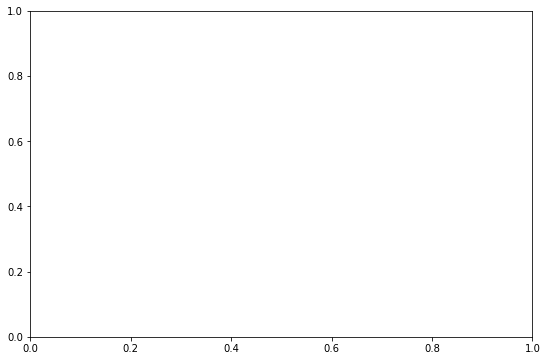

In [76]:
fig, ax = plt.subplots(figsize = (9,6))
type(fig), type(ax)

The axes object has a method `plot` defined on it. It takes as its first argument something listy for the x-axis..a list, or a numpy `ndarray`, or a Pandas Series. The second argument representa the y-data. So, for example:

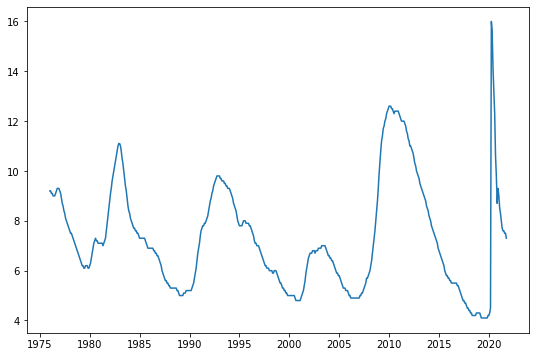

In [77]:
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(data['DATE'], data['CAUR'])

We'll use some other methods on the axes object to create a nicely labeled plot:

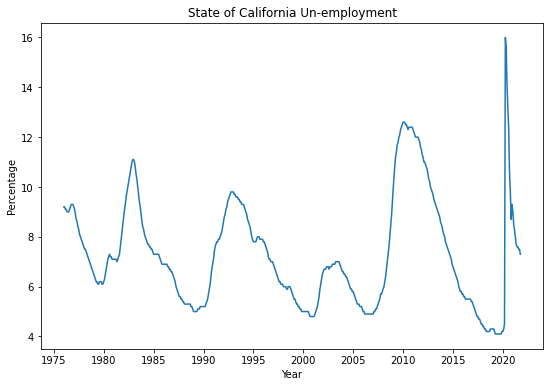

In [78]:
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(data['DATE'], data['CAUR'])
ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
ax.set_title("State of California Un-employment");

## 6. Putting it all together

We are now in the position of keeping our promise of being able to make a comparative plot of employment rates.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
width_inches = 9
subplot_height_inches = 2

In [68]:
def get_unemployment_data(state_abbrev):
    data = pd.read_csv("data/"+state_abbrev+"UR.csv")
    data['DATE'] = pd.to_datetime(data['DATE'])
    return data

We now provide the `subplots` constructor function with an additional argument, the number of rows. We want to make a figure with multiple rows, each row corresponding to a state. The figure size needs to change too, as the height must keep up with the number of states in the `states` list. Then, the enumeration gives us the index for each state, and uses that index to match the axes for the subplot. We use that axes to plot the corresponding data, labeling the y-axis for each subplot with the state abbreviation. Finally we set an x-label on the last axes, and a title on the first one!

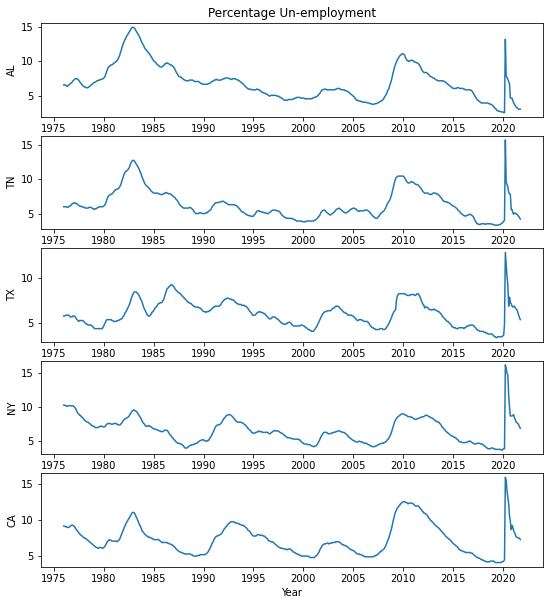

In [82]:
fig, ax = plt.subplots(nrows=len(states), 
    figsize = (width_inches, subplot_height_inches*len(states)))
for i, state_abbrev in enumerate(states):
    data = state_data[state_abbrev]
    ax[i].plot(data['DATE'], data[state_abbrev+'UR'])
    ax[i].set_ylabel(state_abbrev)
ax[-1].set_xlabel("Year")
ax[0].set_title("Percentage Un-employment");

## 7. What did you learn?

At the end of this workshop, you are now able to create reasonably complex plots from data! This is because you understand enough of Python to be dangerous: its libraries, its dictionaries, how many things behave like lists, and how these lists can be used to make plots.

## 8. Homework

Ok, so we delivered on our promise of making you capable of writing non-trivial python programs. Now, you can become even more dangerous by learning how to read text files directly, and then how to parse these text files and calculate statistics on the words inside of them.

### Files

The built-in `open()` function is a **constructor** that creates a Python file object, which serves as a link to a file residing on your machine. After calling 'open()', data can be transferred to and from the associated file by calling the returned file object's **methods**.

At this point, you can read data from the file as a whole (`.read()`, or n bytes at a time, `.read(n`). You can read a line at a time with `.readline()`, and all the lines into a list of strings  with `.readlines()`. Or simply treat the file like a list and iterate through it: you will get line by line. Similar methods exist for writing.

You must close the file `.close()` after you finish using it.

![](https://github.com/univai-pyprep-c1/BasicPython/raw/9a66b164175e3032fb88db4112754c1cb07ac4d8//listiness.slides.dir/10.png)

In [79]:
fd = open("data/CAUR.csv")
thecontents = fd.read()
fd.close()
type(thecontents)

str

The text read in from a file is a **string** of characters. Gere are the first 200

In [80]:
thecontents[0:200]

'DATE,CAUR\n1976-01-01,9.2\n1976-02-01,9.2\n1976-03-01,9.1\n1976-04-01,9.1\n1976-05-01,9.0\n1976-06-01,9.0\n1976-07-01,9.000\n1976-08-01,9.100\n1976-09-01,9.200\n1976-10-01,9.300\n1976-11-01,9.3\n1976-12-01,9.300\n'

### Strings

Strings are objects which behave like lists, but just like lists, also have methods defined on them.

In [81]:
# a long string in python split over multiple lines
alongstring = """
Hello World
Hello My Friends
"""

In [82]:
# a string is listy
for character in alongstring:
    print(character, end=":")


:H:e:l:l:o: :W:o:r:l:d:
:H:e:l:l:o: :M:y: :F:r:i:e:n:d:s:
:

In [83]:
# how did I find the arguments to print out?
?print

Docstring:
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
Type:      builtin_function_or_method


Here's a method that splits the string on whitespace (including newlines, tabs, and spaces)

In [84]:
alongstring.split()

['Hello', 'World', 'Hello', 'My', 'Friends']

### Files are like lists

In [85]:
fd = open("data/Julius Caesar.txt")
counter = 0
for line in fd:
    if counter < 10: # print first 10 lines, there are lots!
        print("<<", line, ">>")
    counter = counter + 1 # also writeable as counter += 1
fd.close()

<< THE TRAGEDY OF JULIUS CAESAR
 >>
<< 
 >>
<< 
 >>
<< by William Shakespeare
 >>
<< 
 >>
<< 
 >>
<< Contents
 >>
<< 
 >>
<< ACT I
 >>
<< Scene I. Rome. A street.
 >>


Notice that the newlines remain. You can use the string method `strip` on `line` to remove them. 

In [86]:
fd = open("data/Julius Caesar.txt")
counter = 0
for line in fd:
    if counter < 10: # print first 10 lines
        print("<<", line.strip(), ">>")
    else:
        break # break out of for loop
    counter = counter + 1 # also writeable as counter += 1
fd.close()
print(counter)

<< THE TRAGEDY OF JULIUS CAESAR >>
<<  >>
<<  >>
<< by William Shakespeare >>
<<  >>
<<  >>
<< Contents >>
<<  >>
<< ACT I >>
<< Scene I. Rome. A street. >>
10


### What about writing?

We may want to modify or process files, and then write them out. For this we must use the `open` constructor with an additional argument, which signifies that we are in a writing mode.

In [87]:
fd = open("data/CAUR.csv")
fd2 = open("data/CAUR.txt", "w")
fd2.write(thecontents)
fd.close()
fd2.close()

### Finally the homework question

Read Julius Caesar. Get each line. Remove newline characters from each line. Split the line to get the words from the line (use the split method on strings). Lowercase them (use the lower method on strings). Now let us make a histogram that has the counts of all the words in the play. Use a dictionary `worddict` which will store these counts as values, with the words as keys.

In [88]:
# your code here
## Read a file, parse lines, and get all UNIQUE words

worddict = dict() # make a set with unique items  
fd = open("data/Julius Caesar.txt")
lines = fd.readlines()
fd.close()
# strip newline characters and other whitespace off the edges
cleaned_lines = [line.strip() for line in lines] 
# make a list of lists. 
# each inner list if the list of words on that line
list_of_lines_words = [line.split() for line in lines]
# Take each list of words, and get all the words
for lines_words in list_of_lines_words:
    lines_words_lower = [l.lower() for l in lines_words]
    for word in lines_words_lower:
        if not word in worddict:
            worddict[word] = 1
        else:
            worddict[word] += 1

We sort the worddict, using the function worddict.get to provide the values, which are the counts. We print the top 20 counts

In [89]:
topwords = sorted(worddict, key = worddict.get, reverse=True)
top20 = topwords[:20]
for word in top20:
    print(word, worddict[word])

the 629
and 627
i 499
to 422
of 374
you 312
a 275
that 269
is 236
in 228
brutus. 215
not 207
my 189
he 185
for 168
his 157
with 156
it 153
cassius. 150
be 144


Now we use matplotlib to plot a horizontal bar chart for these top 20

<BarContainer object of 20 artists>

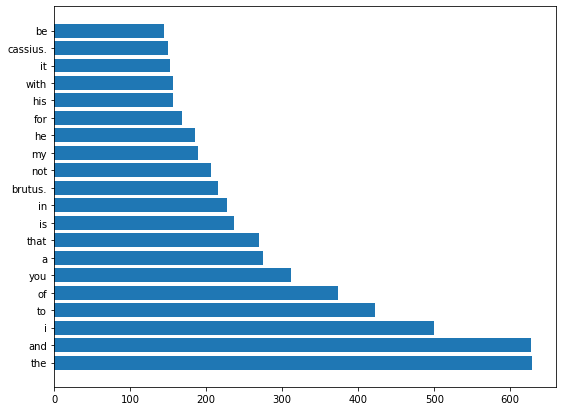

In [90]:
fig, ax = plt.subplots(figsize=(9, 7))
pos = range(len(top20))
ax.barh(pos, [worddict[word] for word in top20],
                     align='center',
                     tick_label=top20)